In [1]:
%matplotlib inline
from scipy.io import *
import numpy as np
import matplotlib.pyplot as plt
import sys
from dave import DAVE

In [2]:
s = np.load('Q:\\data\\20110225\\sdo.x766y1118.20110225.npz')
data = np.float32(s['hmi'])
k = 127

In [3]:
q = DAVE(data).run()

In [4]:
x = q.get()

<h2>Differential Affine Velocity Estimator (DAVE) ($Schuck, ApJ 2006$):

<p>$C(\xi,\tau,\Delta t,P) = \Delta t^2 \displaystyle\int d t d^2x w(x-\xi,t-\tau)\{\frac{\partial B_n(x,t)}{\partial t} + 
\nabla_t \cdot [B_n(x,t)v_t(P,x)]\}^2$

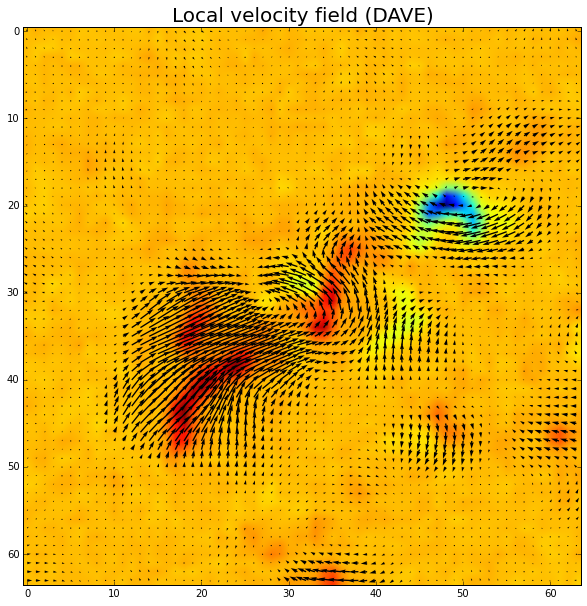

In [5]:
plt.figure(figsize = (10,10))
plt.title('Local velocity field (DAVE)', size = 20)
plt.imshow(data[k,:,:])
plt.quiver(x[0,k,:,:], x[1,k,:,:])

In [6]:
sys.path.append('Q:\\python\\lib')
from pyfield import *

dim = (64,64,64)

B1 = np.gradient(-PField(data[k,:,:], 64))

idx = np.indices(dim).astype(np.float32)  
X = np.zeros(dim+(4,), dtype = np.float32)
B = np.zeros(dim+(4,), dtype = np.float32)

X[:,:,:,0] = idx[0,:,:,:] - dim[0]/2
X[:,:,:,1] = idx[1,:,:,:] - dim[1]/2
X[:,:,:,2] = idx[2,:,:,:] - dim[2]/2
X[:,:,:,3] = 1.



for i in range(0,64):
    X[:,:,i,0] += x[0,k,:,:]*np.exp(-i/32.)
    X[:,:,i,1] += x[1,k,:,:]*np.exp(-i/32.)

B[:,:,:,0] = B1[0]
B[:,:,:,1] = B1[1]
B[:,:,:,2] = B1[2]

In [7]:
sys.path.append('Q:\\python\\opencl-rotB')
from window import *
import rotB

cle = rotB.Integrator(X, B, 1e4)
cle.start()
    
#window(cle, video_dir = '/video')

In [61]:
cle.stop()

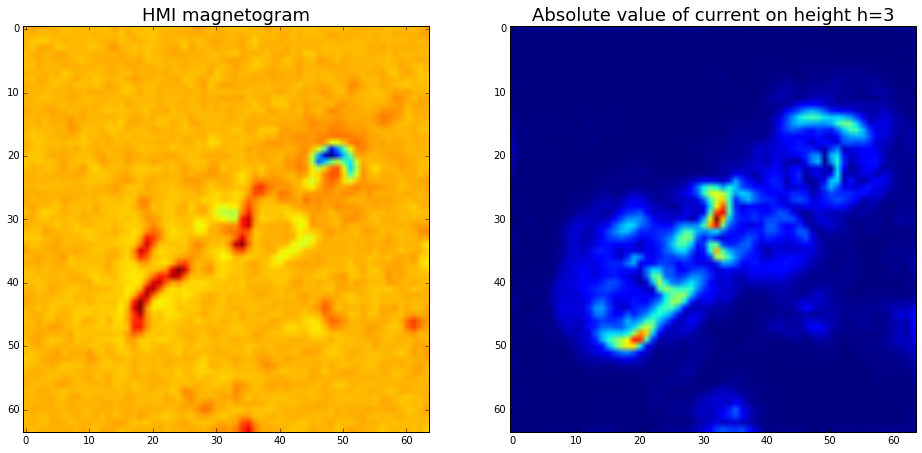

In [38]:
plt.figure(figsize = (16,8))
#plt.imshow(cle._Current[:,:,4,1])
plt.subplot(121)
plt.title('HMI magnetogram', size = 18)
plt.imshow(B[:,:,0,2])
plt.subplot(122)
plt.title('Absolute value of current on height h=3', size = 18)
plt.imshow(np.sqrt(np.sum(cle._Current[:,:,3,:]**2,axis=2)))

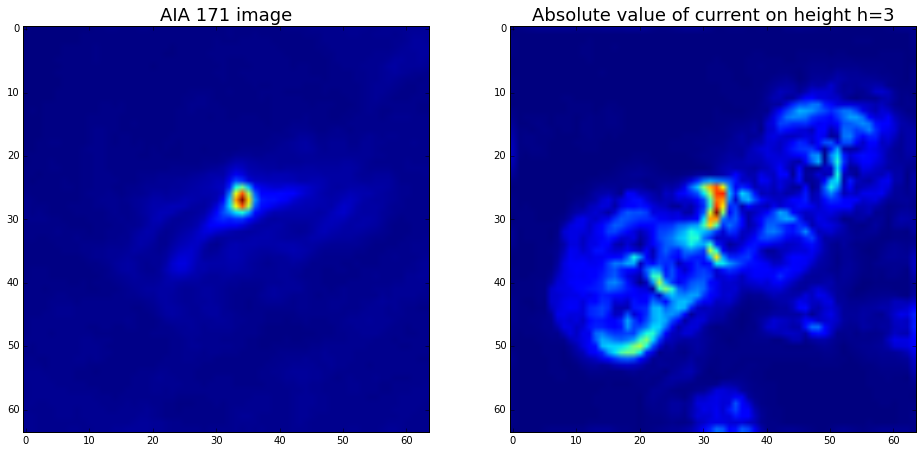

In [62]:
temp = s['aia_171'][500,:,:]
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.title('AIA 171 image', size = 18)
plt.imshow(temp)
plt.subplot(122)
plt.title('Absolute value of current on height h=3', size = 18)
plt.imshow(np.sqrt(np.sum(cle._Current[:,:,3,:]**2,axis=2)))